#                          ***Predicting House Prices with Linear Regression***   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
file_path = '/content/Housing.csv'
data = pd.read_csv(file_path)


In [ ]:
# Data Exploration: Display basic statistics
print(data.describe())


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [ ]:
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


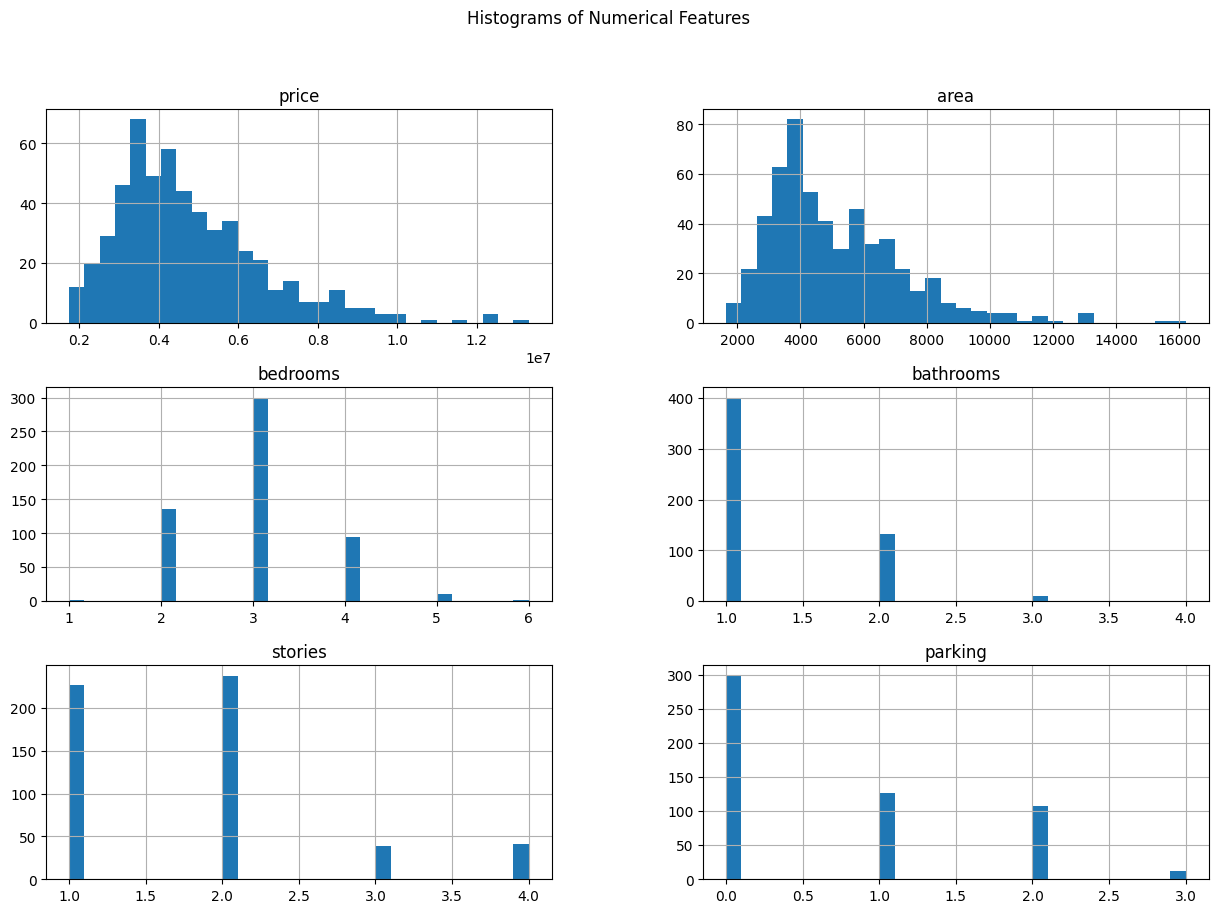

In [ ]:
# Data Visualization: Histograms for numerical features
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

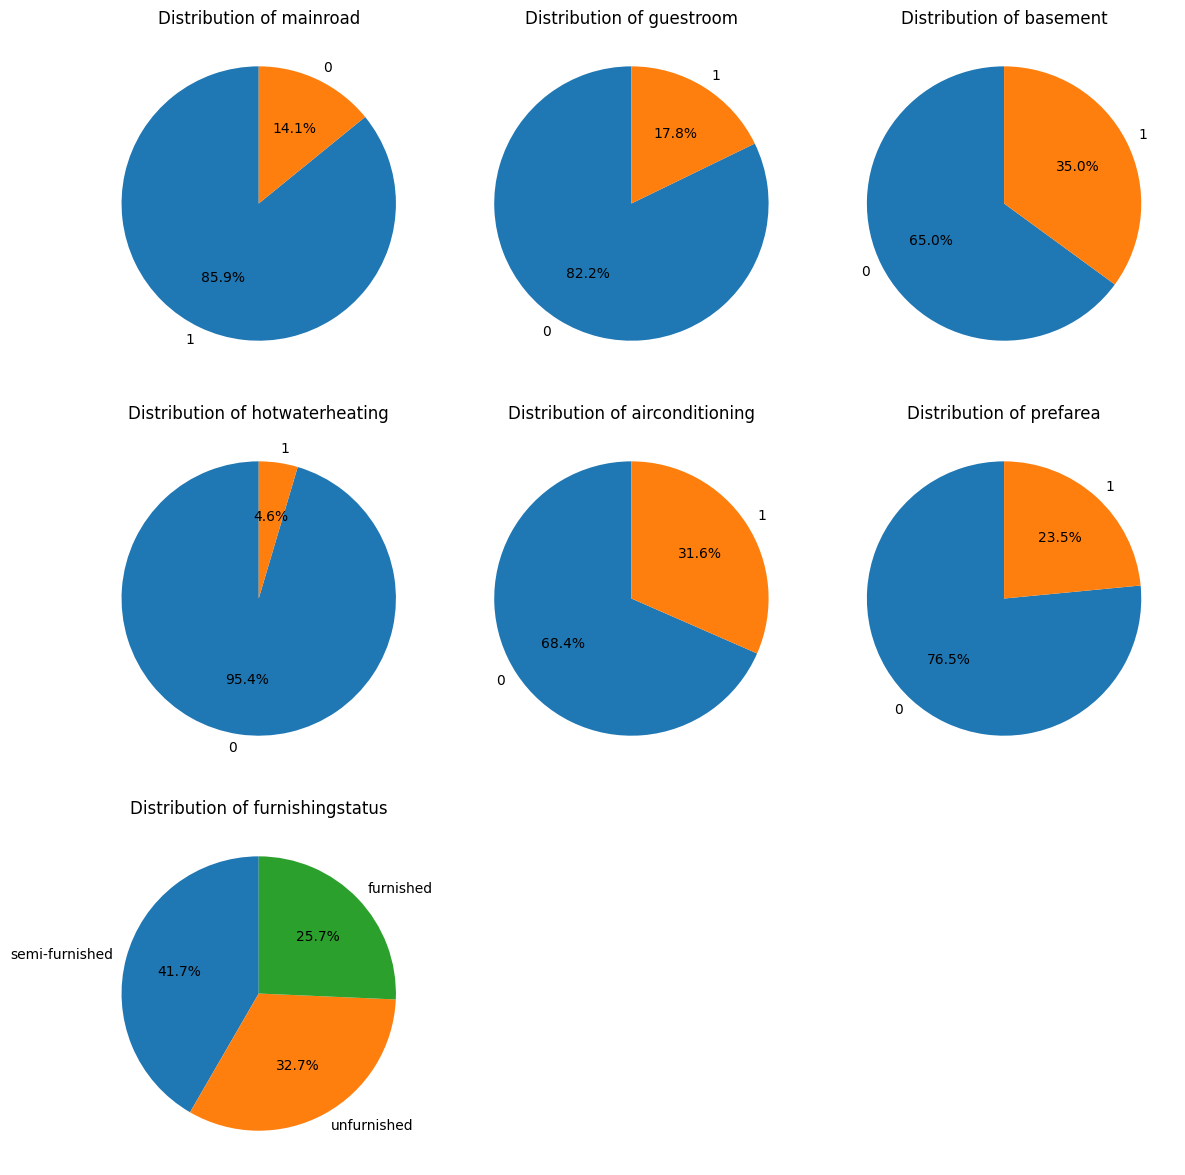

In [ ]:
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Calculate the number of rows and columns
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # To ensure enough rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    data[feature].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


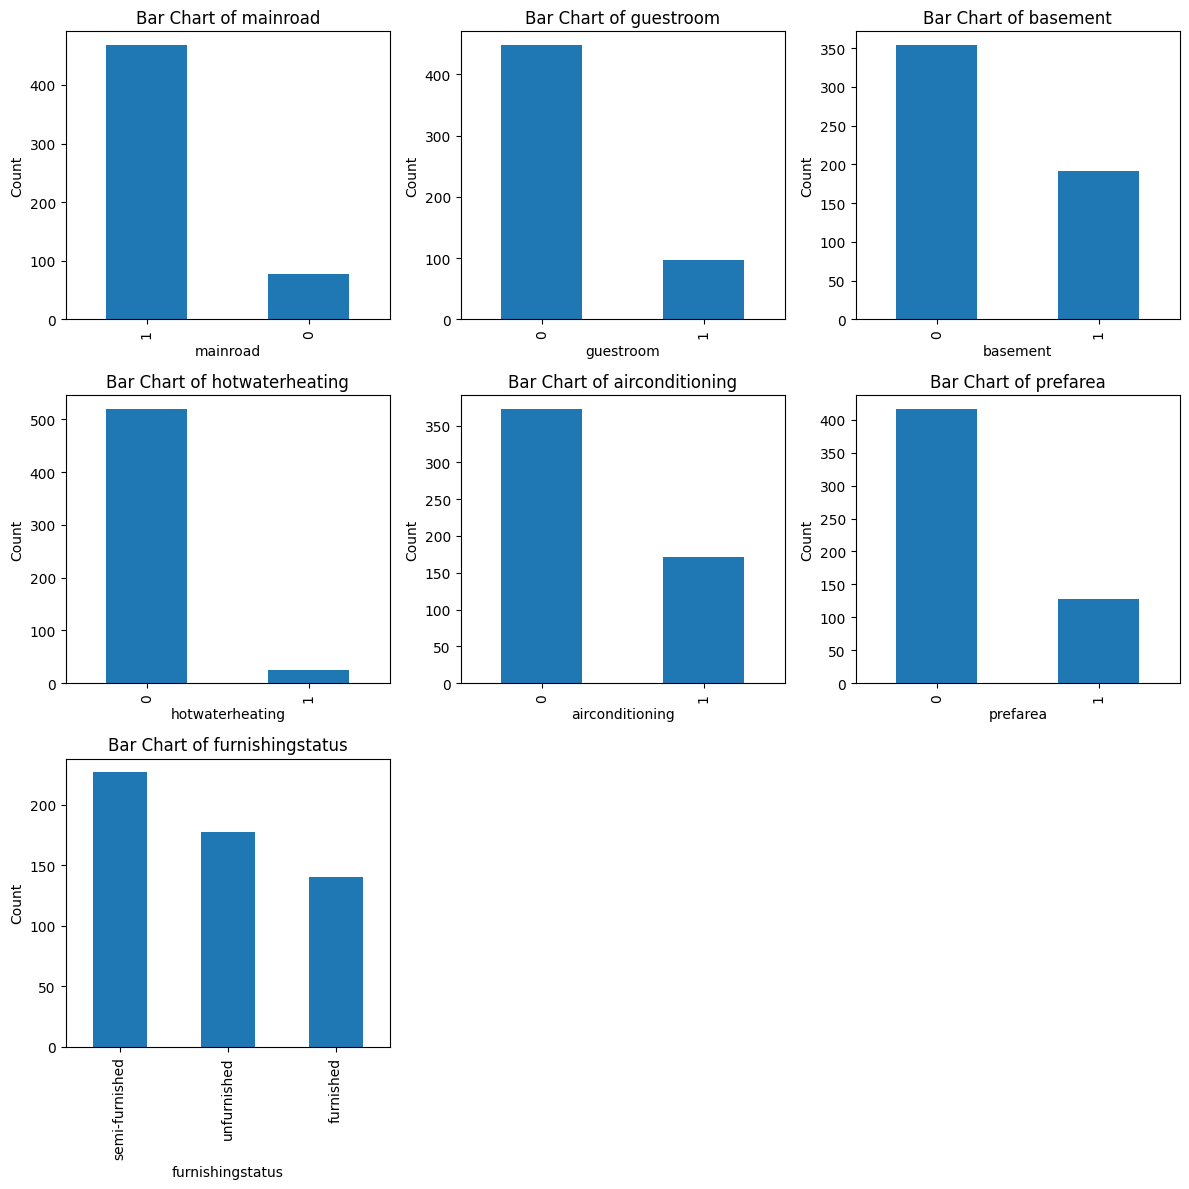

In [ ]:
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Calculate the number of rows and columns
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # To ensure enough rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    data[feature].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(f'Bar Chart of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


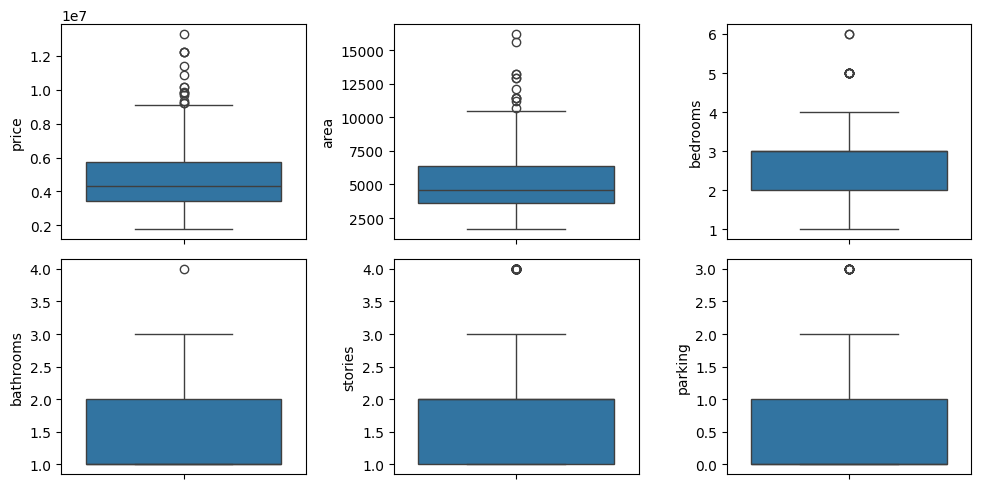

In [ ]:
#outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

In [ ]:
 #Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [ ]:
# Define the features (X) and the target variable (y)
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']


In [ ]:


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


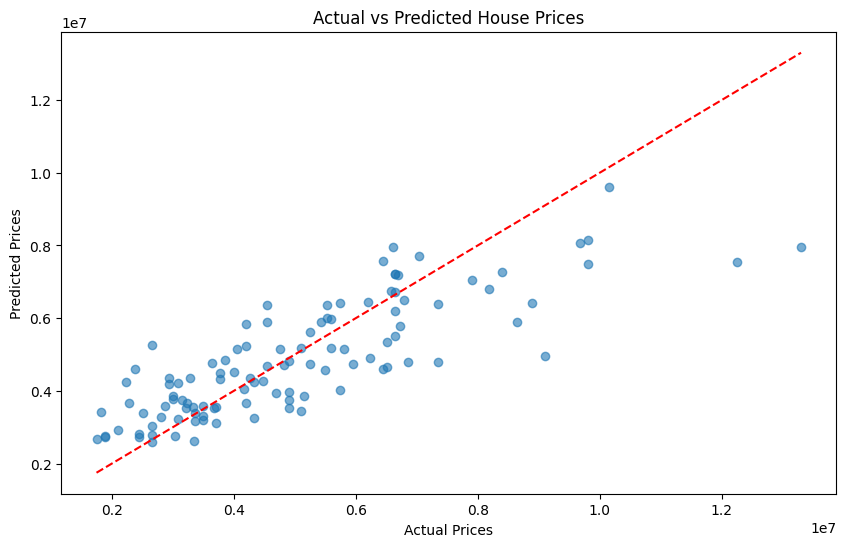

In [ ]:
# Visualization: Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

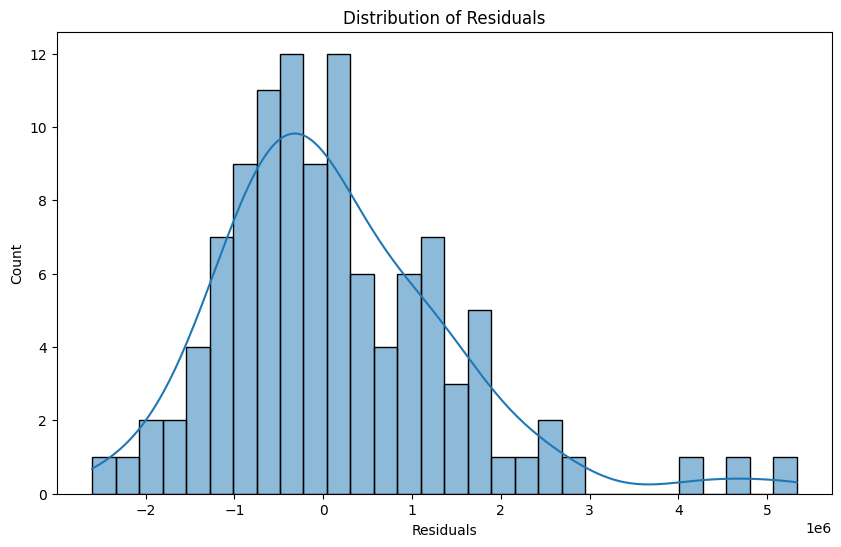

In [ ]:
# Visualization: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


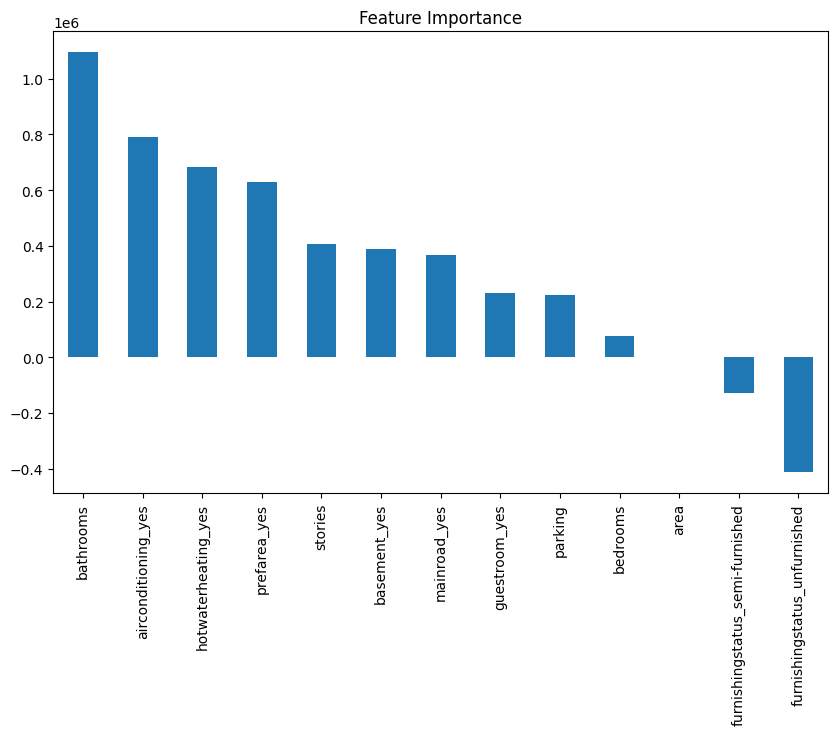

In [ ]:
# Visualization: Feature Importance (coefficients)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
coefficients['Coefficient'].plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


Linear Regression RMSE: 1324506.96009144, MAE: 970043.4039201642, R²: 0.6529242642153177
Random Forest RMSE: 1400565.9728553821, MAE: 1021546.0353211008, R²: 0.611918531405699
XGBoost RMSE: 1448271.5156378068, MAE: 1072215.5642201835, R²: 0.5850309164229286


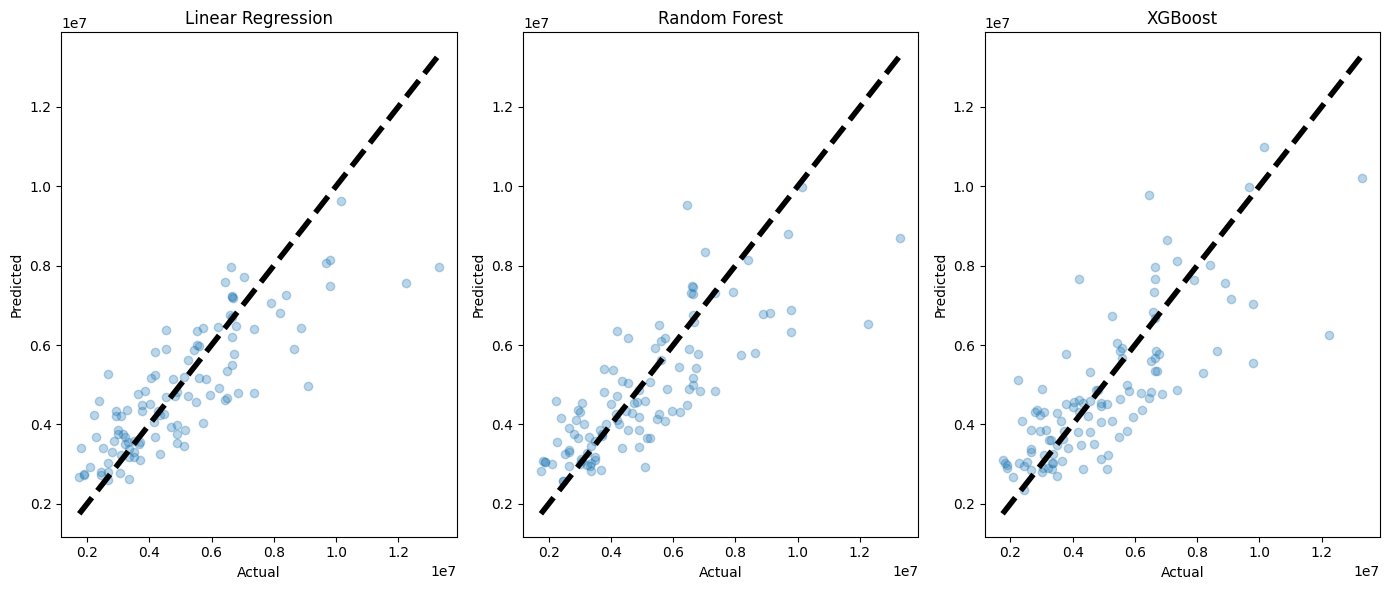

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train an XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, y_test):
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return rmse, mae, r2

lr_rmse, lr_mae, lr_r2 = evaluate_model(lr_predictions, y_test)
rf_rmse, rf_mae, rf_r2 = evaluate_model(rf_predictions, y_test)
xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(xgb_predictions, y_test)

# Print the evaluation metrics
print(f"Linear Regression RMSE: {lr_rmse}, MAE: {lr_mae}, R²: {lr_r2}")
print(f"Random Forest RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}")
print(f"XGBoost RMSE: {xgb_rmse}, MAE: {xgb_mae}, R²: {xgb_r2}")

# Plot the predictions
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

plt.subplot(1, 3, 3)
plt.scatter(y_test, xgb_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost')

plt.tight_layout()
plt.show()